# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/tisonbertrand/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


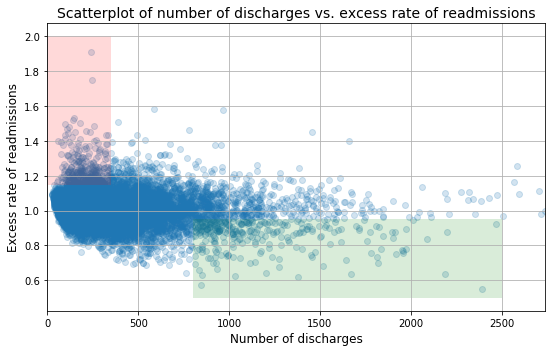

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I think we don't have enough analysis to conclude that the rate of readmissions is trending down with increasing number of discharges.

First because the slope is almost flat. We should calculate the Pearson correlation coefficient.

Then, because the mean excess readmission rate difference between small and large facilities could be due to chance. We have to check the probability of getting this difference with a null hypothesis testing.

I disagree with the conclusions, because even if we prove that the hospital size and readmission rates are correlated, it does not mean there is a causal relation between the size of the facility and the lack of resources.

In [5]:
from scipy import stats

In [6]:
pearson, p_value = stats.pearsonr(x,y)
print('pearson correlation coefficient = ', pearson)
print('probability of having this pearson coefficient with uncorrelated data =', p_value)

pearson correlation coefficient =  -0.0930955428759
probability of having this pearson coefficient with uncorrelated data = 1.50227564265e-23


There is a very high probability that the number of discharges and the excessive rate of readmission are correlated.

Now, I will compare 2 populations: the facilities with less than 100 discharges and the facilities with more than 1000 discharges.

In [7]:
data = clean_hospital_read_df.iloc[81:-3]

In [8]:
d1 = data[data['Number of Discharges']<100]['Excess Readmission Ratio']
d2 = data[data['Number of Discharges']>1000]['Excess Readmission Ratio']
print(len(d1), len(d2))

1188 460


The null hypothesis is: the mean excess readmission rate is the same for both populations.

The alternate hypothesis is: the mean excess readmission rate is higher for d1.

The sample size is large enough to calculate $t$ statistics

In [9]:
t_statistic, p_value = stats.ttest_ind(d1, d2, equal_var=False)
print('p_value = ',p_value/2)

p_value =  1.39643522851e-13


The probability of getting this mean difference under the null hypothesis is very low.

We can reject the null hypothesis, the mean excess readmission ratio is higher in facilities with less than 100 discharges.

Although it's statistically significant that the excess readmission ratio is higher in smaller facilities, it's not practically significant because the correlation is not strong, and we know there are many factors influencing the excess readmission ratio. Correlation does not mean causal relation.

In [10]:
import seaborn as sns

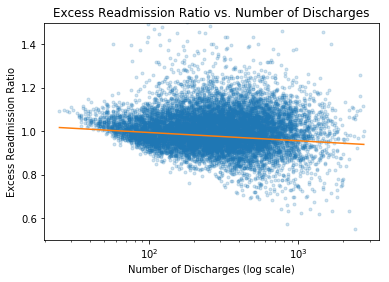

In [11]:
_ = plt.plot(x, y, marker='.', linestyle='none', alpha=0.2)
slope, intercept = np.polyfit(x,y,1)
xln = np.array([np.min(x),np.max(x)])
yln = xln*slope + intercept
_ = plt.plot(xln, yln)
_ = plt.xscale('log')
_ = plt.xlabel('Number of Discharges (log scale)')
_ = plt.ylabel('Excess Readmission Ratio')
_ = plt.ylim([0.5,1.5])
_ = plt.title('Excess Readmission Ratio vs. Number of Discharges')

I used a log scale to see better the small size facilities, and zoomed the excess readmission ratio from 0.5 to 1.5.

i also draw the linear regression to show the trend.

In [12]:
# Separate the facilities in number of discharge groups
t1 = len(data[data['Number of Discharges']<100])
t2 = len(data[data['Number of Discharges']<200])
t3 = len(data[data['Number of Discharges']<300])
t4 = len(data[data['Number of Discharges']<400])
t5 = len(data[data['Number of Discharges']<500])
t6 = len(data[data['Number of Discharges']<1000])
t7 = len(data)

print('number of samples in each category = ',t1, t2-t1, t3-t2, t4-t3, t5-t4, t6-t5, t7-t6)

cat = ['<100']*t1 + ['100-200']*(t2-t1) + ['200-300']*(t3-t2) + ['300-400']*(t4-t3) + ['400-500']*(t5-t4) + ['500-1000']*(t6-t5)+ ['>1000']*(t7-t6)
cat = pd.Series(cat)


number of samples in each category =  1188 2729 2191 1655 1120 2150 461


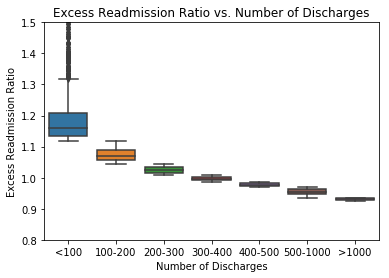

In [13]:
_ = sns.boxplot(x=cat, y=data['Excess Readmission Ratio'])
_ = plt.title('Excess Readmission Ratio vs. Number of Discharges')
_ = plt.xlabel('Number of Discharges')
_ = plt.ylim([0.8,1.5])

On this boxplot where the facilities are grouped in categories, it's easier to see the differences of the ratio.

I would suggest to focus the investigation on the small facilities and get more information to find out why their readmission ratio is high.

I would also check how the expected readmission rate is calculated, because the high ratio could be explained by a not so good model to calculate the expected readmission rate in small facilities.

My last recommendation would be to find other criteria that could influence the excess readmission ratio and investigate them.